<a href="https://colab.research.google.com/github/micheloh/prd_abc/blob/master/Bandas_Rock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtenção dos dados

Este notebook tem o objetivo de apresentar um exemplo de análise estatística de textos.

No caso, serão analisadas letras de músicas de artistas disponibilizadas no portal 'https://www.letras.mus.br/'. Elas serão obtidas por scraping.

O objetivo é comparar as letras das músicas de 2 bandas de hardcore capixabas.

São exemplos de 3 perguntas a serem feitas para guiar a análise:

Quais serão as palavras mais citadas por cada banda?
Pela nuvem de palavras é possível reconhecer a banda?
Qual a banda que utiliza mais palavras distintas?

In [1]:

import string
import sys
from urllib.request import urlopen
import nltk
from bs4 import BeautifulSoup
import pandas as pd

url_base = 'https://www.letras.mus.br/'

In [2]:
# Função para coletar os links das músicas
def get_links_musics_artist(artist: str):
  pages = set()
  try:
    html = urlopen(f'{url_base}/{artist}/mais_acessadas.html')
    bs = BeautifulSoup(html, 'html.parser')
    for link in bs.find('ul', {'class': 'cnt-list-songs'}).find_all('a'):
      if 'href' in link.attrs:
        if link.attrs['href'] not in pages:
          pages.add(f"{link.attrs['href']}")
  except Exception as e:
        print(f'Erro ao recuperar informações do artista {artist}: {e}')
  return pages

# Função para coletar a letra das músicas a partir do link
def get_lyrics_from_link(link: str):
  music = ''
  try:
    html = urlopen(f"{url_base}/{link}")
    bs = BeautifulSoup(html, 'html.parser')
    for verse in bs.find('div', {'class': 'cnt-letra'}).find_all('p'):
      music += ' '.join(verse.stripped_strings)
      music += ' '
  except Exception as e:
    print(f'Erro ao recuperar informações do link {link}: {e}')
  return music

In [3]:
#(dura cerca de 10 minutos)
lista_de_artistas = ['capital-inicial', 'skank']

map_artist_lyrics = {}
for item in lista_de_artistas:
  lyrics = ''
  i = 1
  for link in get_links_musics_artist(item):
    print('musica {} do artista {}'.format(i,item))
    lyrics = lyrics + get_lyrics_from_link(link)
    i=i+1
  map_artist_lyrics[item] = lyrics.lower()

musica 1 do artista capital-inicial
musica 2 do artista capital-inicial
musica 3 do artista capital-inicial
musica 4 do artista capital-inicial
musica 5 do artista capital-inicial
musica 6 do artista capital-inicial
musica 7 do artista capital-inicial
musica 8 do artista capital-inicial
musica 9 do artista capital-inicial
musica 10 do artista capital-inicial
musica 11 do artista capital-inicial
musica 12 do artista capital-inicial
musica 13 do artista capital-inicial
musica 14 do artista capital-inicial
musica 15 do artista capital-inicial
musica 16 do artista capital-inicial
musica 17 do artista capital-inicial
musica 18 do artista capital-inicial
musica 19 do artista capital-inicial
musica 20 do artista capital-inicial
musica 21 do artista capital-inicial
musica 22 do artista capital-inicial
musica 23 do artista capital-inicial
musica 24 do artista capital-inicial
musica 25 do artista capital-inicial
musica 26 do artista capital-inicial
musica 27 do artista capital-inicial
musica 28 

In [ ]:
df = pd.DataFrame.from_dict(map_artist_lyrics, orient='index').reset_index()

In [ ]:
df.rename(columns={'index':'artist', 0:'raw_content'}, inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df.to_pickle('/content/drive/MyDrive/Colab Notebooks/letras_rock_br.pickle')
df_novo = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/letras_rock_br.pickle')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df[df.artist=='dead-fish']['raw_content'].values

In [ ]:
df[df.artist=='mukeka-di-rato']['raw_content'].values

In [ ]:
import re
regex = r'\w+'
def tokenizar_com_regex(texto):
  regex = r'\w+'
  return re.findall(regex,texto)

df['tokens_content'] = df.raw_content.apply(tokenizar_com_regex)

In [ ]:
df['tokens_content']

0    [dois, mil, anos, mais, apenas, por, termos, f...
1    [amasse, essa, pedra, com, minha, cabeça, esvi...
Name: tokens_content, dtype: object

In [ ]:
df['total_tokens'] = df.tokens_content.apply(len)

In [ ]:
df.sort_values('total_tokens', ascending=False)[['artist', 'total_tokens']]

,artist,total_tokens
0,dead-fish,22580
1,mukeka-di-rato,11613


In [ ]:
from collections import Counter

df['frequency_words_raw'] = df.tokens_content.apply(Counter)

df['most_common_words'] = df.apply(lambda row: row['frequency_words_raw'].most_common(30), axis=1) 

In [ ]:
df['frequency_words_raw']

0    {'dois': 8, 'mil': 5, 'anos': 12, 'mais': 227,...
1    {'amasse': 1, 'essa': 42, 'pedra': 9, 'com': 8...
Name: frequency_words_raw, dtype: object

In [ ]:
df['most_common_words']

0    [(o, 653), (a, 607), (que, 606), (e, 597), (nã...
1    [(de, 307), (o, 298), (a, 268), (e, 259), (que...
Name: most_common_words, dtype: object

In [ ]:
df[df.artist=='dead-fish'].most_common_words.values[0]

[('o', 653),
 ('a', 607),
 ('que', 606),
 ('e', 597),
 ('não', 573),
 ('de', 420),
 ('se', 322),
 ('é', 313),
 ('pra', 240),
 ('em', 234),
 ('mais', 227),
 ('um', 220),
 ('você', 201),
 ('me', 177),
 ('por', 147),
 ('do', 140),
 ('tudo', 130),
 ('vai', 124),
 ('eu', 115),
 ('no', 111),
 ('te', 110),
 ('ser', 110),
 ('os', 108),
 ('sem', 103),
 ('uma', 98),
 ('quem', 98),
 ('mas', 94),
 ('sempre', 87),
 ('seu', 85),
 ('com', 82)]

In [ ]:
df[df.artist=='mukeka-di-rato'].most_common_words.values[0]

[('de', 307),
 ('o', 298),
 ('a', 268),
 ('e', 259),
 ('que', 242),
 ('não', 226),
 ('é', 162),
 ('eu', 140),
 ('do', 135),
 ('um', 119),
 ('em', 97),
 ('da', 97),
 ('no', 95),
 ('você', 95),
 ('se', 94),
 ('na', 93),
 ('com', 83),
 ('me', 83),
 ('pra', 77),
 ('vai', 73),
 ('mas', 63),
 ('uma', 60),
 ('seu', 56),
 ('sua', 51),
 ('vou', 51),
 ('mais', 46),
 ('só', 45),
 ('meu', 45),
 ('essa', 42),
 ('nada', 42)]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [ ]:
def remove_stopwords(words):
    return [word for word in words if word not in stopwords]

In [ ]:
df['tokens_content_clean'] = df.tokens_content.apply(remove_stopwords)

In [ ]:
df.tokens_content_clean

0    [dois, mil, anos, apenas, termos, fechado, olh...
1    [amasse, pedra, cabeça, esvicerando, núcleo, p...
Name: tokens_content_clean, dtype: object

In [ ]:
df['frequency_words_raw'] = df.tokens_content_clean.apply(Counter)

In [ ]:
df['most_common_words'] = df.apply(lambda row: row['frequency_words_raw'].most_common(20), axis=1) 

In [ ]:
df['most_common_words']

0    [(pra, 240), (tudo, 130), (vai, 124), (sempre,...
1    [(pra, 77), (vai, 73), (vou, 51), (nada, 42), ...
Name: most_common_words, dtype: object

In [ ]:
stopwords.extend(['pra', 'vai', 'vou', 'tudo', 'i', 'the', 'you', 'sempre', 1,2,3,4,5,6,7,8,9,0])

In [ ]:
df['tokens_content_clean'] = df.tokens_content.apply(remove_stopwords)
df['frequency_words_raw'] = df.tokens_content_clean.apply(Counter)
df['most_common_words'] = df.apply(lambda row: row['frequency_words_raw'].most_common(20), axis=1) 

In [ ]:
df['most_common_words']

0    [(vida, 73), (and, 70), (nada, 69), (tão, 67),...
1    [(nada, 42), (punk, 36), (vida, 31), (fazer, 2...
Name: most_common_words, dtype: object

In [ ]:
df['quantity_unique_words'] = df.frequency_words_raw.apply(len)

In [ ]:
df['quantity_total_words'] = df.tokens_content_clean.apply(len)

In [ ]:
df['quantity_total_words']

0    13004
1     7007
Name: quantity_total_words, dtype: int64

In [ ]:
df['tax_original_words'] = df['quantity_unique_words']/df['quantity_total_words']

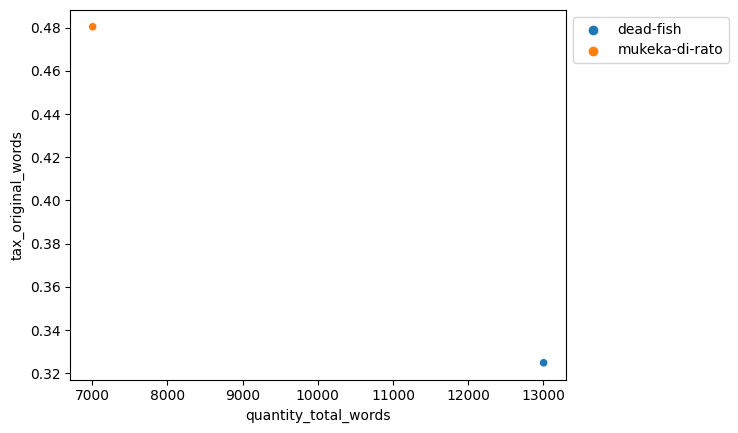

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="quantity_total_words", y="tax_original_words", 
                hue="artist", palette="tab10")

plt.legend(bbox_to_anchor=(1, 1), loc=2) 

In [ ]:
df.sort_values('tax_original_words')

,artist,raw_content,tokens_content,total_tokens,frequency_words_raw,most_common_words,tokens_content_clean,quantity_unique_words,quantity_total_words,tax_original_words
0,dead-fish,"dois mil anos mais, apenas por termos fechado ...","[dois, mil, anos, mais, apenas, por, termos, f...",22580,"{'dois': 8, 'mil': 5, 'anos': 12, 'apenas': 14...","[(vida, 73), (and, 70), (nada, 69), (tão, 67),...","[dois, mil, anos, apenas, termos, fechado, olh...",4224,13004,0.324823
1,mukeka-di-rato,amasse essa pedra com minha cabeça esvicerando...,"[amasse, essa, pedra, com, minha, cabeça, esvi...",11613,"{'amasse': 1, 'pedra': 9, 'cabeça': 15, 'esvic...","[(nada, 42), (punk, 36), (vida, 31), (fazer, 2...","[amasse, pedra, cabeça, esvicerando, núcleo, e...",3366,7007,0.480377


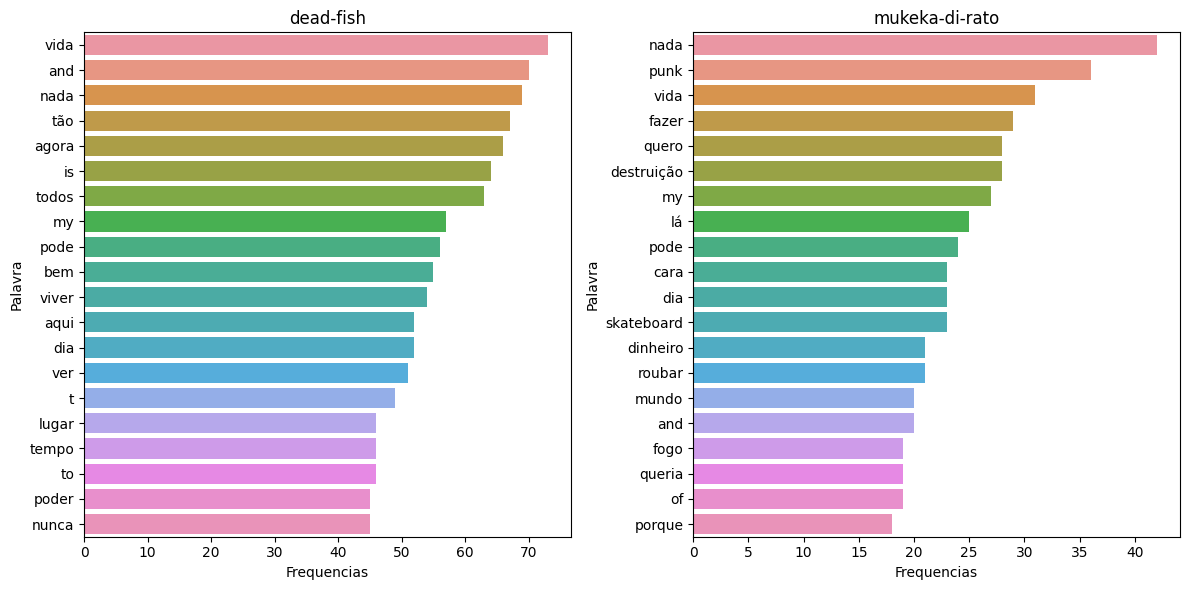

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Escolha os artistas que você deseja plotar (2 artistas no total)
artistas = lista_de_artistas[:2]

# Crie uma figura com 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Itere sobre os subplots e plote os gráficos de barras
for ax, artista in zip(axes.flatten(), artistas):
    palavras, frequencias = zip(*df[df.artist == artista].most_common_words.values[0])
    df2 = pd.DataFrame({'Palavra': palavras, 'Frequencias': frequencias})
    sns.barplot(y='Palavra', x='Frequencias', data=df2, orient='h', ax=ax)
    ax.set_title(artista)  # Defina o título de cada subplot

# Ajuste o layout dos subplots
plt.tight_layout()

# Exiba o gráfico
plt.show()


In [ ]:
# instalação 
!pip install wordcloud  -q


In [ ]:
from PIL import features
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df.columns

Index(['artist', 'raw_content', 'tokens_content', 'total_tokens',
       'frequency_words_raw', 'most_common_words', 'tokens_content_clean',
       'quantity_unique_words', 'quantity_total_words', 'tax_original_words'],
      dtype='object')

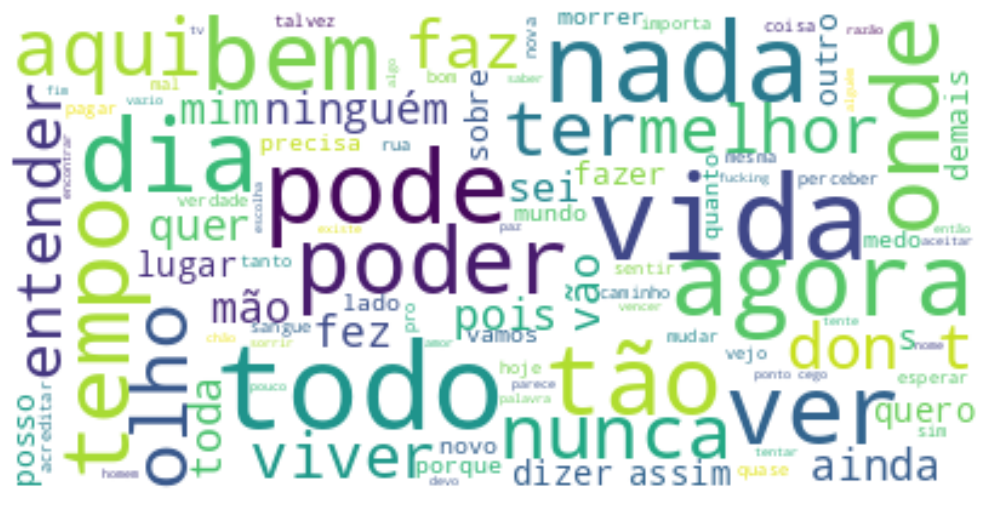

In [ ]:
# Concatenar as palavras/tokens

def join_tokens(tokens_list):
    return ' '.join([word for word in tokens_list])

df['wordcloud'] = df['tokens_content_clean'].apply(lambda x: join_tokens(x))
all_tokens_legiao = df[df.artist=='dead-fish'].wordcloud.values[0]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color=
                      "white").generate(all_tokens_legiao)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

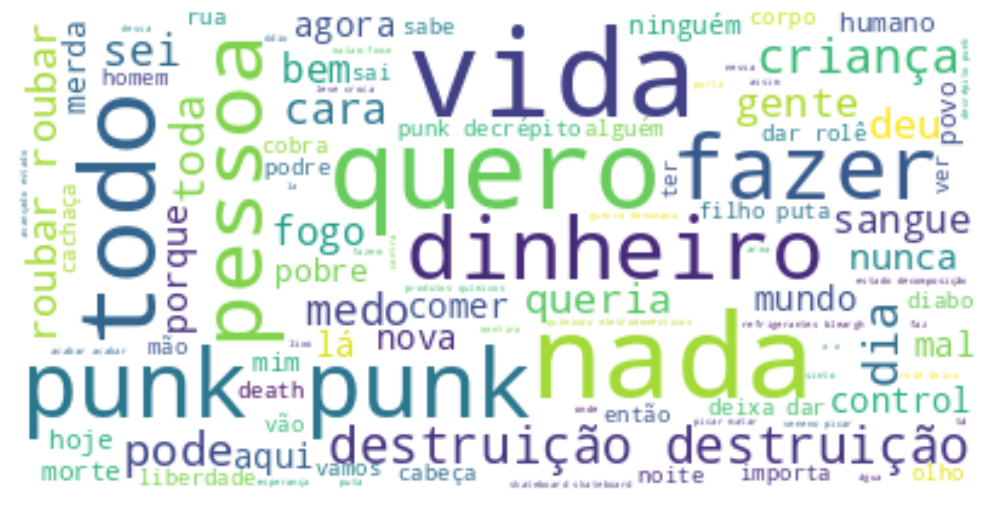

In [ ]:
# Concatenar as palavras/tokens

def join_tokens(tokens_list):
    return ' '.join([word for word in tokens_list])

df['wordcloud'] = df['tokens_content_clean'].apply(lambda x: join_tokens(x))
all_tokens_legiao = df[df.artist=='mukeka-di-rato'].wordcloud.values[0]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color=
                      "white").generate(all_tokens_legiao)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from itertools import islice

# bigramas
df['bigrams'] = df['tokens_content_clean'].apply(lambda row: list(nltk.ngrams(row, 2)))

In [ ]:
df['bigrams']

0    [(dois, mil), (mil, anos), (anos, apenas), (ap...
1    [(amasse, pedra), (pedra, cabeça), (cabeça, es...
Name: bigrams, dtype: object

In [ ]:
df['frequency_bigrams'] = df.bigrams.apply(Counter)
df['most_common_bigrams'] = df.apply(lambda row: row['frequency_bigrams'].most_common(20), axis=1) 
df['quantity_original_bigrams'] = df.frequency_bigrams.apply(len)

In [ ]:
df['most_common_bigrams']

0    [((don, t), 36), ((ponto, cego), 18), ((shark,...
1    [((punk, punk), 24), ((destruição, destruição)...
Name: most_common_bigrams, dtype: object

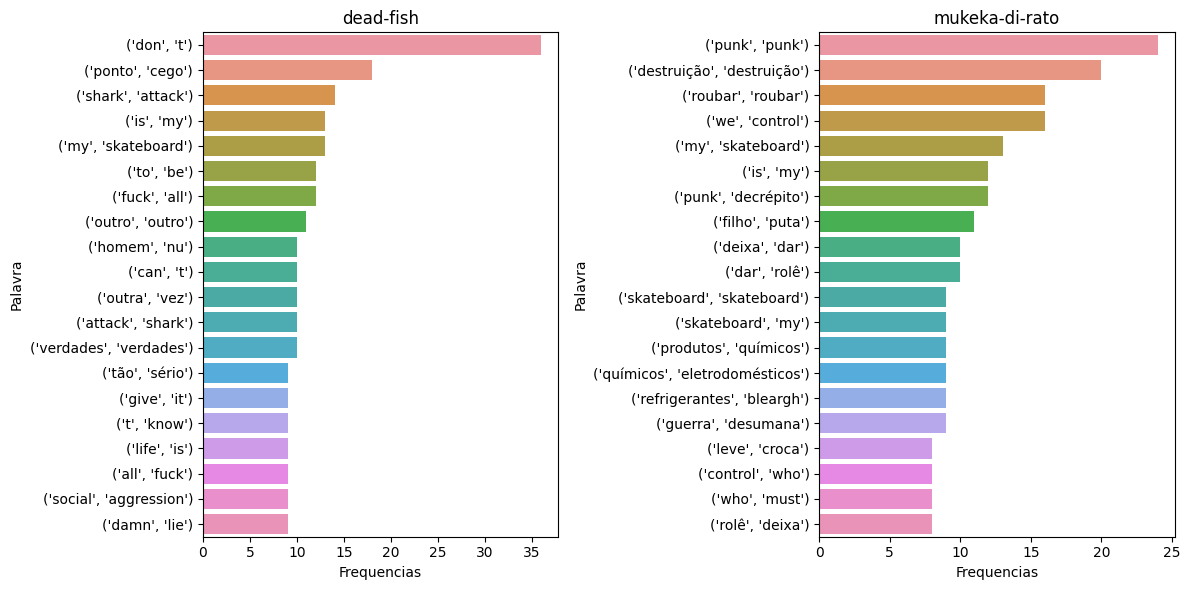

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Escolha os artistas que você deseja plotar (2 artistas no total)
artistas = lista_de_artistas[:2]

# Crie uma figura com 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Itere sobre os subplots e plote os gráficos de barras
for ax, artista in zip(axes.flatten(), artistas):
    bigrams, frequencias = zip(*df[df.artist == artista].most_common_bigrams.values[0])
    df2 = pd.DataFrame({'Palavra': bigrams, 'Frequencias': frequencias})
    sns.barplot(y='Palavra', x='Frequencias', data=df2, orient='h', ax=ax)
    ax.set_title(artista)  # Defina o título de cada subplot

# Ajuste o layout dos subplots
plt.tight_layout()

# Exiba o gráfico
plt.show()
